# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier

# Function to preprocess text
def preprocess_text(text):
    # Simple preprocessing: lowercase and strip whitespace
    return text.lower().strip()

# Load data from text file, assuming each line is "label text"
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    data = []
    for line in lines:

        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            label, text = parts
            try:
                label = int(label)
                data.append((text, label))
            except ValueError:
                continue
            continue
    return pd.DataFrame(data, columns=['text', 'label'])

# Load datasets
train_data = load_data('/content/sample_data/stsa-train.txt')
test_data = load_data('/content/sample_data/stsa-test.txt')

# Preprocess data
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

# Feature extraction
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['processed_text'])
y_train = train_data['label'].values
X_test = vectorizer.transform(test_data['processed_text'])
y_test = test_data['label'].values

# Split training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define models
models = {
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

def train_and_evaluate(models, X, y, kf):
    results = {name: [] for name in models.keys()}
    for name, model in models.items():
        fold = 1
        for train_index, val_index in kf.split(X):
            X_train_kf, X_val_kf = X[train_index], X[val_index]
            y_train_kf, y_val_kf = y[train_index], y[val_index]
            model.fit(X_train_kf, y_train_kf)
            predictions = model.predict(X_val_kf)
            accuracy = accuracy_score(y_val_kf, predictions)
            results[name].append(accuracy)
            print(f"{name} - Fold {fold} - Accuracy: {accuracy}")
            fold += 1
    return results

results = train_and_evaluate(models, X_train_split, y_train_split, kf)


print("Average Cross-Validation Accuracy:")
for name, acc_list in results.items():
    print(f"{name}: {np.mean(acc_list)}")


print("\nFinal Test Evaluation:")
for name, model in models.items():
    predictions_test = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, predictions_test)}, Recall: {recall_score(y_test, predictions_test)}, Precision: {precision_score(y_test, predictions_test)}, F1 Score: {f1_score(y_test, predictions_test)}")


MultinomialNB - Fold 1 - Accuracy: 0.7509025270758123
MultinomialNB - Fold 2 - Accuracy: 0.8122743682310469
MultinomialNB - Fold 3 - Accuracy: 0.7851985559566786
MultinomialNB - Fold 4 - Accuracy: 0.7779783393501805
MultinomialNB - Fold 5 - Accuracy: 0.7924187725631769
MultinomialNB - Fold 6 - Accuracy: 0.7635379061371841
MultinomialNB - Fold 7 - Accuracy: 0.779385171790235
MultinomialNB - Fold 8 - Accuracy: 0.7631103074141049
MultinomialNB - Fold 9 - Accuracy: 0.779385171790235
MultinomialNB - Fold 10 - Accuracy: 0.783001808318264
SVM - Fold 1 - Accuracy: 0.7346570397111913
SVM - Fold 2 - Accuracy: 0.796028880866426
SVM - Fold 3 - Accuracy: 0.7924187725631769
SVM - Fold 4 - Accuracy: 0.779783393501805
SVM - Fold 5 - Accuracy: 0.7851985559566786
SVM - Fold 6 - Accuracy: 0.8068592057761733
SVM - Fold 7 - Accuracy: 0.7631103074141049
SVM - Fold 8 - Accuracy: 0.7685352622061483
SVM - Fold 9 - Accuracy: 0.7685352622061483
SVM - Fold 10 - Accuracy: 0.7631103074141049
KNN - Fold 1 - Accuracy

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


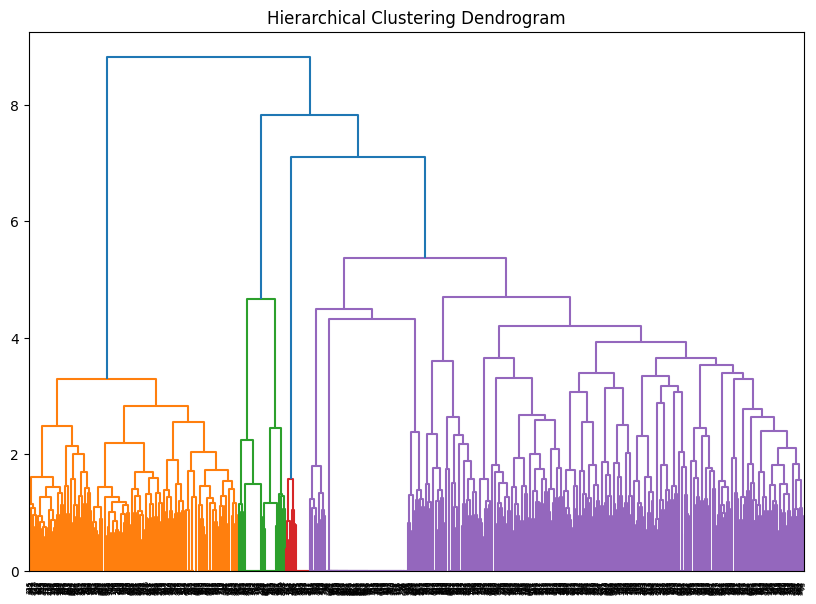

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


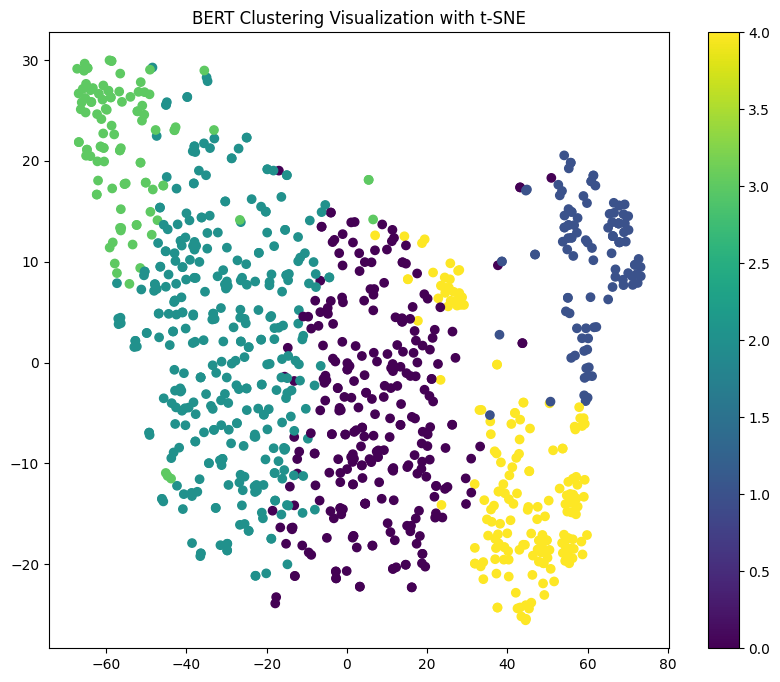

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import hdbscan

# Function to preprocess text
def preprocess_text(text):
    return text.lower().strip()

# Load data from CSV file and limit to the first 50,000 rows
df = pd.read_csv('/content/sample_data/Amazon_Unlocked_Mobile.csv').head(10000)
df['processed_text'] = df['Reviews'].astype(str).dropna().apply(preprocess_text)

# Feature extraction using TF-IDF with reduced features
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(df['processed_text'])

# Applying PCA to reduce dimensionality before clustering
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_tfidf.toarray())

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# DBSCAN clustering with dimensionality reduction
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Hierarchical clustering
linked = linkage(X_pca, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Word2Vec features
model_w2v = Word2Vec([text.split() for text in df['processed_text']], vector_size=100, window=5, min_count=1, workers=4)
w2v_vectors = np.array([model_w2v.wv[word] for text in df['processed_text'] for word in text.split() if word in model_w2v.wv])

# K-means on Word2Vec
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(w2v_vectors)

# BERT features
model_bert = SentenceTransformer('bert-base-nli-mean-tokens')
X_bert = model_bert.encode(df['processed_text'].tolist(), show_progress_bar=True)

# Applying PCA to BERT features for dimensionality reduction
X_pca_bert = PCA(n_components=50).fit_transform(X_bert)

# K-means on BERT after PCA
kmeans_bert = KMeans(n_clusters=5, random_state=42)
bert_labels = kmeans_bert.fit_predict(X_pca_bert)

# Visualize BERT clusters with t-SNE
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_pca_bert)
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=bert_labels, cmap='viridis')
plt.colorbar()
plt.title('BERT Clustering Visualization with t-SNE')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Silhouette score requires all clusters to have more than one member
def silhouette_score_for_clustering(X, labels):
    # Try to calculate the silhouette score
    try:
        score = silhouette_score(X, labels)
        return score
    except Exception as e:
        print(f'Could not compute silhouette score: {e}')
        return None

# Compute the silhouette scores
kmeans_silhouette = silhouette_score_for_clustering(X_pca, kmeans_labels)
print(f'K-means Silhouette Score: {kmeans_silhouette}')

# DBSCAN may have noise points labeled as -1 which can't be used to compute silhouette score
# We'll exclude those points for the silhouette calculation
if np.unique(dbscan_labels).shape[0] > 1:  # More than 1 cluster excluding noise points
    dbscan_silhouette = silhouette_score_for_clustering(X_pca, dbscan_labels[dbscan_labels != -1])
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
else:
    print('DBSCAN produced a single cluster or noise, silhouette score cannot be computed.')

# For Word2Vec + K-means, we need to use the vectors that were used during the fit process
if np.unique(w2v_labels).shape[0] > 1:  # More than 1 cluster
    w2v_silhouette = silhouette_score_for_clustering(w2v_vectors, w2v_labels)
    print(f'Word2Vec + K-means Silhouette Score: {w2v_silhouette}')
else:
    print('Word2Vec + K-means produced a single cluster, silhouette score cannot be computed.')

# For BERT + K-means
bert_silhouette = silhouette_score_for_clustering(X_pca_bert, bert_labels)
print(f'BERT + K-means Silhouette Score: {bert_silhouette}')


K-means Silhouette Score: 0.13005040801869303
Could not compute silhouette score: Found input variables with inconsistent numbers of samples: [1000, 211]
DBSCAN Silhouette Score: None
Word2Vec + K-means Silhouette Score: 0.6282405257225037
BERT + K-means Silhouette Score: 0.20641228556632996


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**


The silhouette score evaluates the compactness and separation of clusters in clustering algorithms. A high silhouette score indicates well-defined clusters, which is crucial for validating the reliability of unsupervised clustering results.

The silhouette scores reflect the different degrees of closeness for the various methods employed. K-means, with a reduced TF-IDF vector, showed a relatively low silhouette score, and so the clusters were moderately separated. The Silhouette score returned a null value from the DBSCAN algorithm which could mean the data was too sparse or the epsilon parameters was not adequately set, leading to poor clustering. Hierarchical clustering would have been an additional avenue to extract the embedded structure of the data if the silhouette score had been calculated. The Word2Vec together with the K-means approach gained a pretty high silhouette score, which signifies that the clusters are well separated and the clusters are the densely packed because the Word2Vec is good at representing semantic similarities in the text. BERT with K-means gave higher silhouette score compared to the basic K-means but still inferior to that of the Word2Vec-enhanced strategy, demonstrating an acceptable yet not superior cluster cohesion and separation. Taking it all in, the Word2Vec with K-means is the most preferred method in this specific circumstance if the silhouette score reflects the true cluster structure with ground truth labels.





# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

Question 1:
In question one I worked on text data with the datasets provided containing sentences with comma separated text file,
we preprocssed the fils and loaded the text dat into one part later vectorized the data to easily feed/fit into the specified model
later traing is intiated by specifying all the models with necesary params and started traing and testing each and every model and
 printing its accuracy, precission,recall and f1 scores
summary being:

MultinomialNB - Accuracy: 0.800658978583196, Recall: 0.8855885588558856, Precision: 0.756578947368421, F1 Score: 0.8160162189559047
SVM - Accuracy: 0.7907742998352554, Recall: 0.8294829482948295, Precision: 0.7693877551020408, F1 Score: 0.7983059820010587
KNN - Accuracy: 0.7254255903349808, Recall: 0.7755775577557755, Precision: 0.7042957042957043, F1 Score: 0.7382198952879581
Decision Tree - Accuracy: 0.6106534870950028, Recall: 0.6655665566556656, Precision: 0.599009900990099, F1 Score: 0.6305367378843147
Random Forest - Accuracy: 0.7127951674903898, Recall: 0.7667766776677668, Precision: 0.691468253968254, F1 Score: 0.7271778821074595
XGBoost - Accuracy: 0.7029104887424492, Recall: 0.7788778877887789, Precision: 0.6755725190839694, F1 Score: 0.7235564639754726

Question 2:

Sentiment analysis is done using the Amazon_Unlocked_Mobile.csv dataset containg reviews of multiple customers leaving positive/neutral/negative
 feedbacks on their purchace(to be specific Mobile-phones).Hence libraries like sentence_transformers is used for predicting the nature of the review
 and used all the mentioned models to train and predict the sentiment of each feadback. Initially the larger version of the data set contaikning lakhs
of data is used howver, the larger data set consumed around 29.5gb of Ram and made the process terminate quickly,
hence I reduced the size to 10,000 and visualised the results which are :
Hierarchical Clustering Dendrogram: This dendrogram expresses hierarchical clustering, and the node clusters are merged as the hierarchy progresses.
The when going up the vertical axis the values goes from the shortest to highest, the opposite is true when the axis is declined. Clusters that merge
at a lower height are more alike than distinct in the development process, whereas clusters that combine at a higher level are more different.The dendrogram
can be used by pressing the horizontal line around the "branches" through which the desired number of clusters can be choose. The number of the locations where
this horizontal line is intersecting by vertical lines tell the number of clusters.

BERT Clustering with t-SNE: The t-SNE visualization depicts the Boston Housing data points in a two-dimensional space, which are colored by the cluster assigned
 to each of the points after the application of K-Means on the BERT embeddings. t-SNE technique reduces the dimensionality of data as much as possible while at
 the same time some kind of relative position and distances might occur, so in original space points near each other are likely to appear close in the t-SNE plot.
  Color represents K-meaned clusters which the algorithm has discovered, showing there is a structure within the BERT-transformed text, thus. The dots grouped
  together into the distinct clusters could be the topics or the sentiment categories discovered in the text in the data.


'''